In [39]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('s3://covid-data-analysis/covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,3/13/2020,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,3/19/2020,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,3/20/2020,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,3/21/2020,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,3/22/2020,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [3]:
df.shape

(50090, 41)

In [4]:
df.isnull().sum()

iso_code                             289
continent                            578
location                             289
date                                 289
total_cases                          925
new_cases                            925
new_cases_smoothed                  1708
total_deaths                         925
new_deaths                           925
new_deaths_smoothed                 1708
total_cases_per_million              925
new_cases_per_million                925
new_cases_smoothed_per_million      1708
total_deaths_per_million             925
new_deaths_per_million               925
new_deaths_smoothed_per_million     1708
new_tests                          31843
total_tests                        31418
total_tests_per_thousand           31418
new_tests_per_thousand             31843
new_tests_smoothed                 29438
new_tests_smoothed_per_thousand    29438
tests_per_case                     31063
positive_rate                      30600
tests_units     

In [5]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_ra

###### tests_units has lot of categorical values. Lets see that particular column amd find the unique values 

In [6]:
df.tests_units.unique

<bound method Series.unique of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
50085    NaN
50086    NaN
50087    NaN
50088    NaN
50089    NaN
Name: tests_units, Length: 50090, dtype: object>

###### Looks like there is only one unique value that is nan. so this column has no use in data analysis or visualization. So. I am going to delete it.

In [7]:
del df['tests_units']

In [8]:
df.shape

(50090, 40)

###### Lets select only data from Nepal and create a separate dataframe.

In [9]:
nepal = pd.DataFrame(df.loc[df['location'] == 'Nepal'])

In [10]:
nepal.head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34737,NPL,Asia,Nepal,12/31/2019,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34738,NPL,Asia,Nepal,1/1/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34739,NPL,Asia,Nepal,1/2/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34740,NPL,Asia,Nepal,1/3/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34741,NPL,Asia,Nepal,1/4/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34742,NPL,Asia,Nepal,1/5/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34743,NPL,Asia,Nepal,1/6/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34744,NPL,Asia,Nepal,1/7/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34745,NPL,Asia,Nepal,1/8/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34746,NPL,Asia,Nepal,1/9/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


In [11]:
nepal.shape

(289, 40)

###### There is lots of missing values almost from all the columns in the newly formed dataframe, So lets fill these gap with the mean values from the respective columns

In [12]:
nep = pd.DataFrame(nepal.iloc[:,0:4])
nep.head()

,iso_code,continent,location,date
34737,NPL,Asia,Nepal,12/31/2019
34738,NPL,Asia,Nepal,1/1/2020
34739,NPL,Asia,Nepal,1/2/2020
34740,NPL,Asia,Nepal,1/3/2020
34741,NPL,Asia,Nepal,1/4/2020


In [13]:
nep.reset_index(drop=True, inplace=True)
nep.head()

,iso_code,continent,location,date
0,NPL,Asia,Nepal,12/31/2019
1,NPL,Asia,Nepal,1/1/2020
2,NPL,Asia,Nepal,1/2/2020
3,NPL,Asia,Nepal,1/3/2020
4,NPL,Asia,Nepal,1/4/2020


In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 1)
impute_df = imputer.fit_transform(nepal.iloc[:,4:40])

In [15]:
impute_df

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 3.000000e-01,
        7.078000e+01, 5.740000e-01],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 3.000000e-01,
        7.078000e+01, 5.740000e-01],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 3.000000e-01,
        7.078000e+01, 5.740000e-01],
       ...,
       [1.077550e+05, 2.071000e+03, 2.990286e+03, ..., 3.000000e-01,
        7.078000e+01, 5.740000e-01],
       [1.118020e+05, 4.047000e+03, 3.219857e+03, ..., 3.000000e-01,
        7.078000e+01, 5.740000e-01],
       [1.153580e+05, 3.556000e+03, 3.506286e+03, ..., 3.000000e-01,
        7.078000e+01, 5.740000e-01]])

In [16]:
impute_df.shape

(289, 36)

In [17]:
cols=['total_cases','new_cases','new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','new_tests','total_tests','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','tests_per_case','positive_rate','stringency_index','population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index']

In [18]:
len(cols)

36

In [19]:
df_nepal = pd.DataFrame(impute_df, columns=cols)
df_nepal.head(30)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
1,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
2,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
3,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
4,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
5,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
6,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
7,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
8,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
9,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


In [20]:
nep.head()

,iso_code,continent,location,date
0,NPL,Asia,Nepal,12/31/2019
1,NPL,Asia,Nepal,1/1/2020
2,NPL,Asia,Nepal,1/2/2020
3,NPL,Asia,Nepal,1/3/2020
4,NPL,Asia,Nepal,1/4/2020


##### As you can see the above dataframe the data now as per required after using knn imputer. Now lets join the two dataframe and do some visualization

In [21]:
nep_df = nep.join(df_nepal)
nep_df.head(30)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,NPL,Asia,Nepal,12/31/2019,0.0,0.0,0.000,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
1,NPL,Asia,Nepal,1/1/2020,0.0,0.0,0.000,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
2,NPL,Asia,Nepal,1/2/2020,0.0,0.0,0.000,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
3,NPL,Asia,Nepal,1/3/2020,0.0,0.0,0.000,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
4,NPL,Asia,Nepal,1/4/2020,0.0,0.0,0.000,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
5,NPL,Asia,Nepal,1/5/2020,0.0,0.0,0.000,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
6,NPL,Asia,Nepal,1/6/2020,0.0,0.0,0.000,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
7,NPL,Asia,Nepal,1/7/2020,0.0,0.0,0.000,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
8,NPL,Asia,Nepal,1/8/2020,0.0,0.0,0.000,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
9,NPL,Asia,Nepal,1/9/2020,0.0,0.0,0.000,0.0,0.0,0.0,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


In [22]:
nep_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
284,NPL,Asia,Nepal,10/10/2020,100676.0,2059.0,2603.714,600.0,10.0,11.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
285,NPL,Asia,Nepal,10/11/2020,105684.0,5008.0,3016.286,614.0,14.0,12.286,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
286,NPL,Asia,Nepal,10/12/2020,107755.0,2071.0,2990.286,636.0,22.0,14.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
287,NPL,Asia,Nepal,10/13/2020,111802.0,4047.0,3219.857,645.0,9.0,13.000,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
288,NPL,Asia,Nepal,10/14/2020,115358.0,3556.0,3506.286,663.0,18.0,14.286,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


###### Now we have proper info about covid in nepal so lets do visualization

###### At first lets see the no. of covid cases in each day

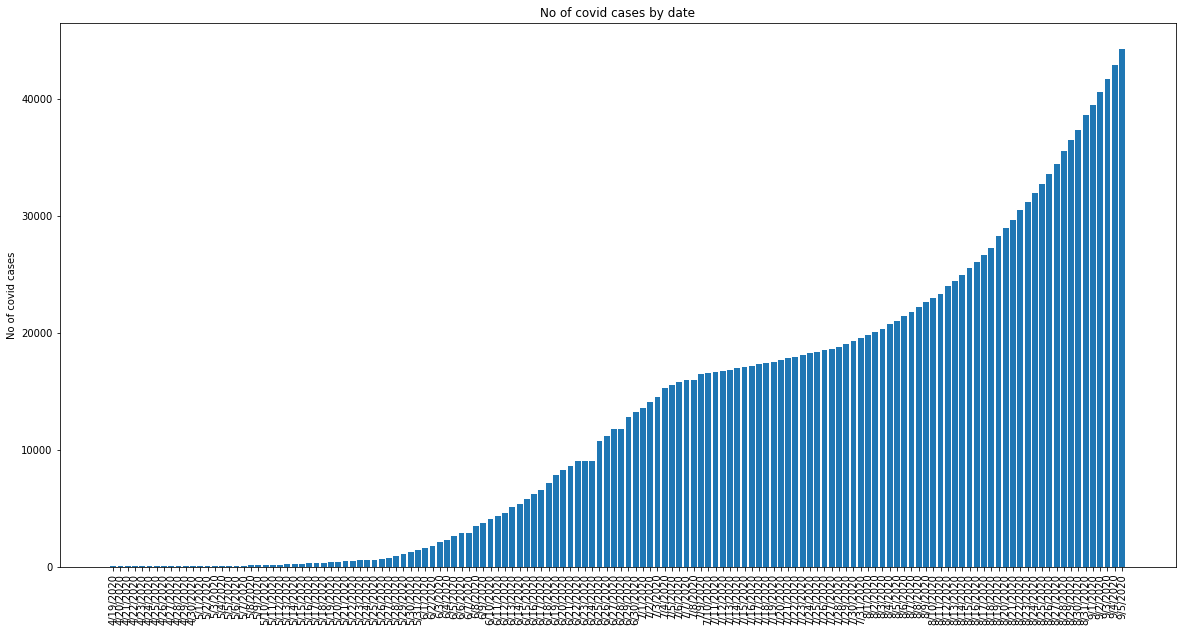

In [23]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("No of covid cases by date")
x=nep_df.date
y=nep_df.total_cases
# Bar chart showing covid cases by date
plt.bar(x[110:250], y[110:250]) 
plt.xticks(x=nep_df.date, rotation='vertical')
# plt.xlim('1/20/2020','10/14/2020')
# Add label for vertical axis
plt.ylabel("No of covid cases")
plt.show()

###### 1st case started from january 20 but we took the value from April 19 where it started to increase rapidly. The date and no of cases are clear and is increasing exponentially.

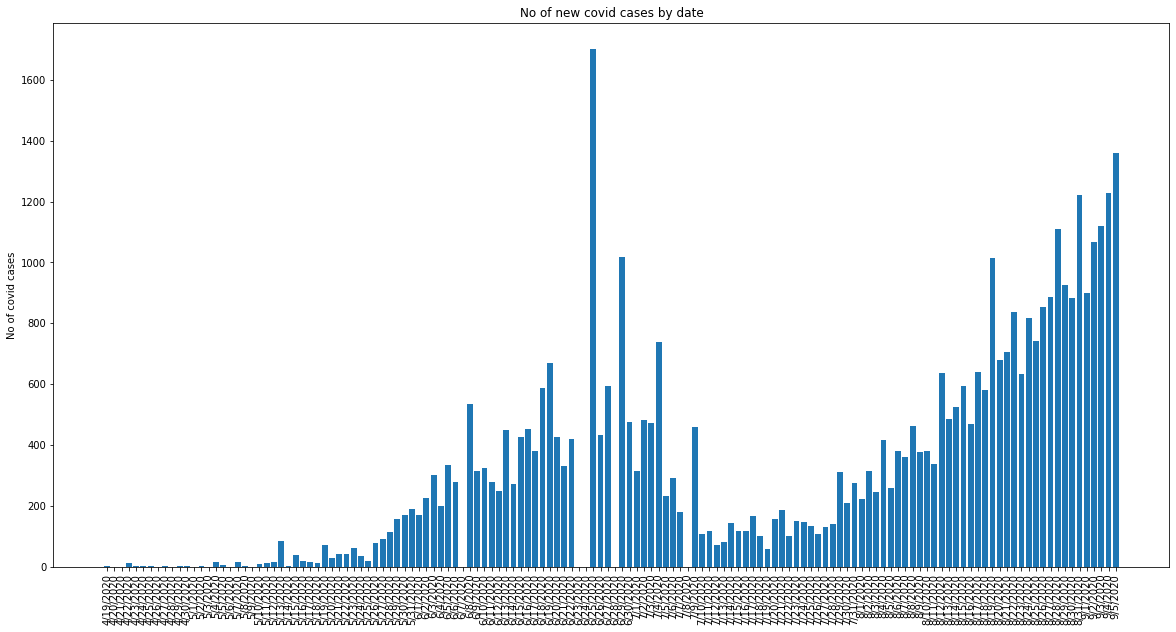

In [24]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("No of new covid cases by date")
x=nep_df.date
y=nep_df.new_cases
# Bar chart showing covid cases by date
plt.bar(x[110:250], y[110:250]) 
plt.xticks(x=nep_df.date, rotation='vertical')
# plt.xlim('1/20/2020','10/14/2020')
# Add label for vertical axis
plt.ylabel("No of covid cases")
plt.show()

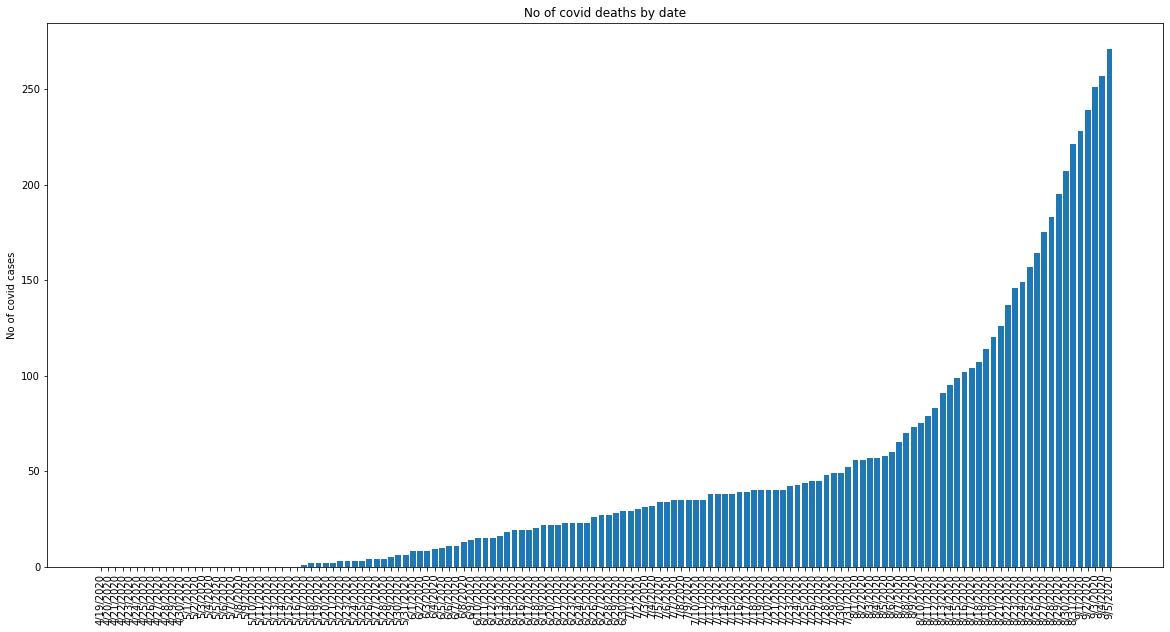

In [25]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("No of covid deaths by date")
x=nep_df.date
y=nep_df.total_deaths
# Bar chart showing covid cases by date
plt.bar(x[110:250], y[110:250]) 
plt.xticks(x=nep_df.date, rotation='vertical')
# plt.xlim('1/20/2020','10/14/2020')
# Add label for vertical axis
plt.ylabel("No of covid cases")
plt.show()

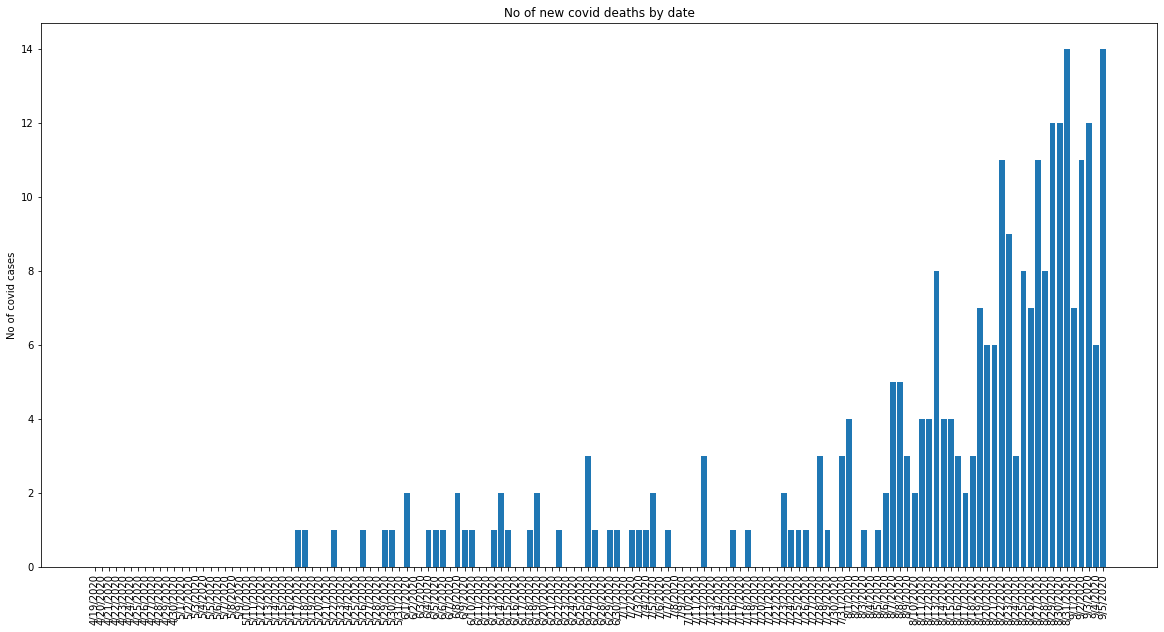

In [26]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("No of new covid deaths by date")
x=nep_df.date
y=nep_df.new_deaths
# Bar chart showing covid cases by date
plt.bar(x[110:250], y[110:250]) 
plt.xticks(x=nep_df.date, rotation='vertical')
# plt.xlim('1/20/2020','10/14/2020')
# Add label for vertical axis
plt.ylabel("No of covid cases")
plt.show()

After july the deaths per day has gradually increasing.

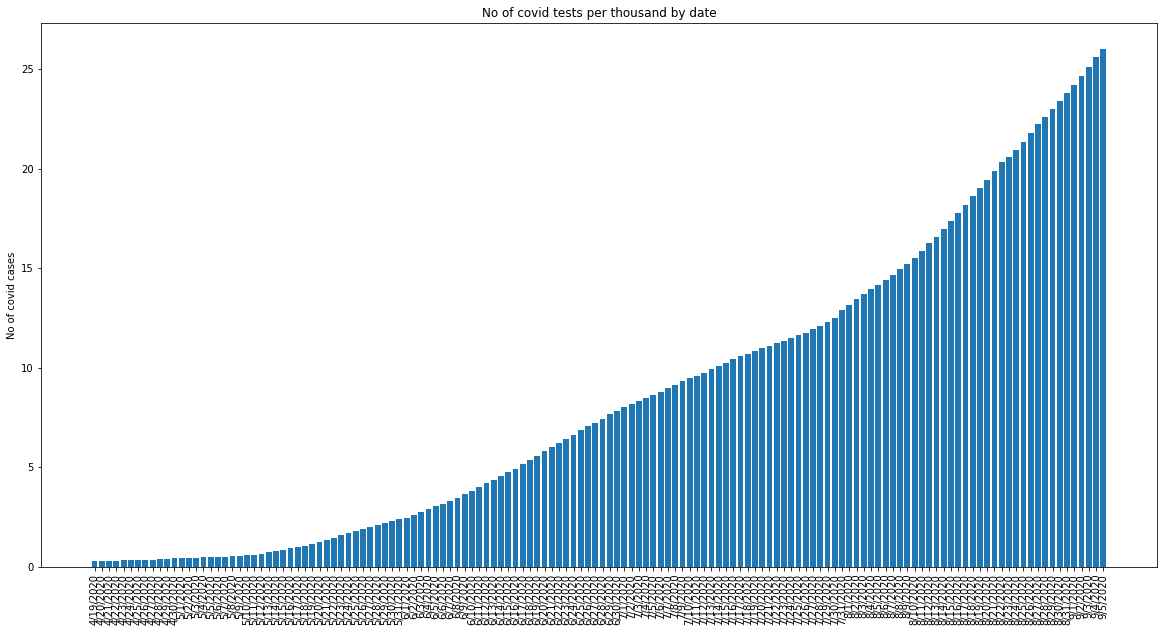

In [27]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("No of covid tests per thousand by date")
x=nep_df.date
y=nep_df.total_tests_per_thousand
# Bar chart showing covid cases by date
plt.bar(x[110:250], y[110:250]) 
plt.xticks(x=nep_df.date, rotation='vertical')
# plt.xlim('1/20/2020','10/14/2020')
# Add label for vertical axis
plt.ylabel("No of covid cases")
plt.show()

##### Covid tests per thousand is quite impressive. the health workers are doing temenduous job

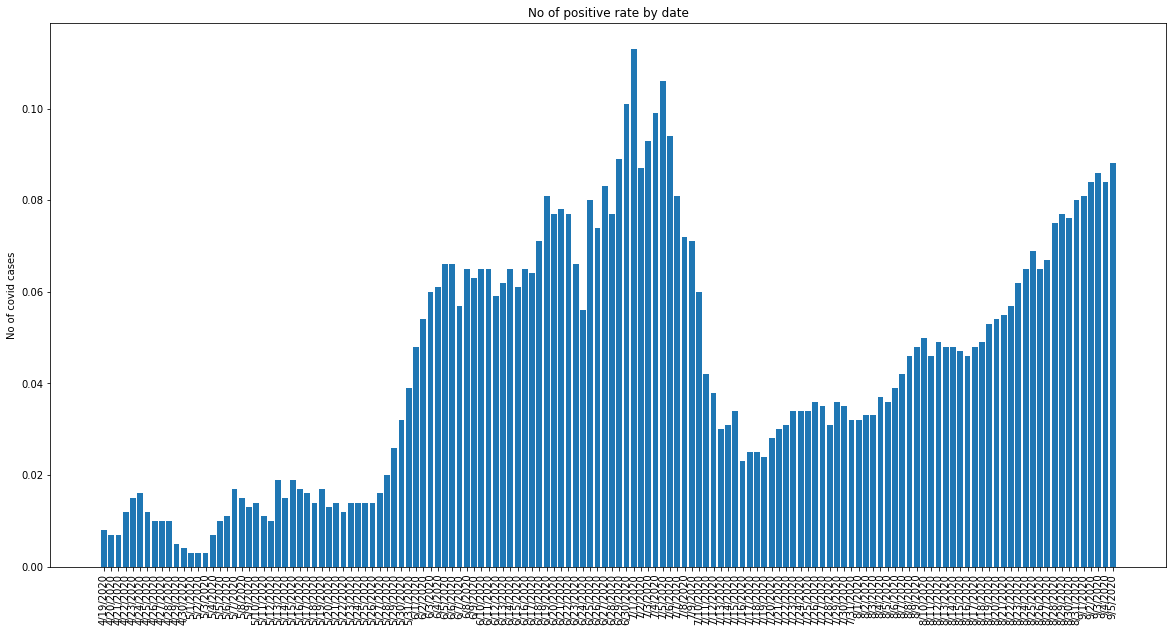

In [28]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("No of positive rate by date")
x=nep_df.date
y=nep_df.positive_rate
# Bar chart showing covid cases by date
plt.bar(x[110:250], y[110:250]) 
plt.xticks(x=nep_df.date, rotation='vertical')
# plt.xlim('1/20/2020','10/14/2020')
# Add label for vertical axis
plt.ylabel("No of covid cases")
plt.show()

Lots of insights can be drawn from here
+ There was strict lockdown in april and may so not much positive cases werent there. Also there were very few infected.
+ As the lockdown was a bit loose in june july cases start to increase. 
+ It also depends on how many tests were done before and during june july
+ During beginning of August cases were low and it gradually increasing

##### Lets make a data frame of that of August to compare total tests and positive rate

In [29]:
august=nep_df[214:245]

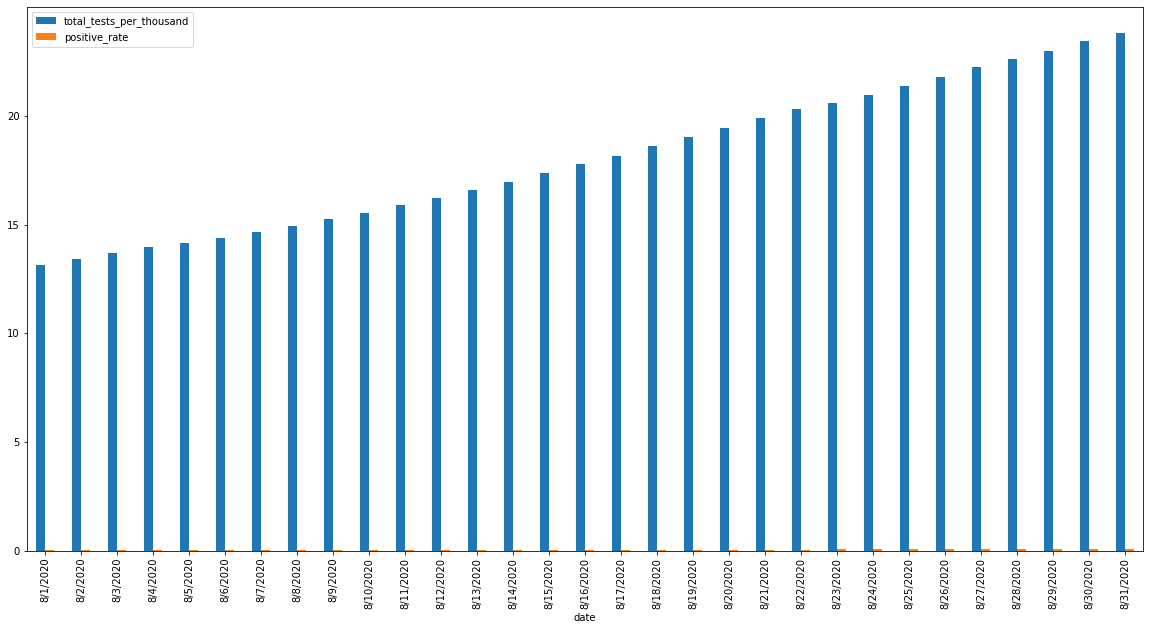

In [30]:
august.plot(x='date', y=['total_tests_per_thousand','positive_rate'], kind="bar",figsize=(20,10))

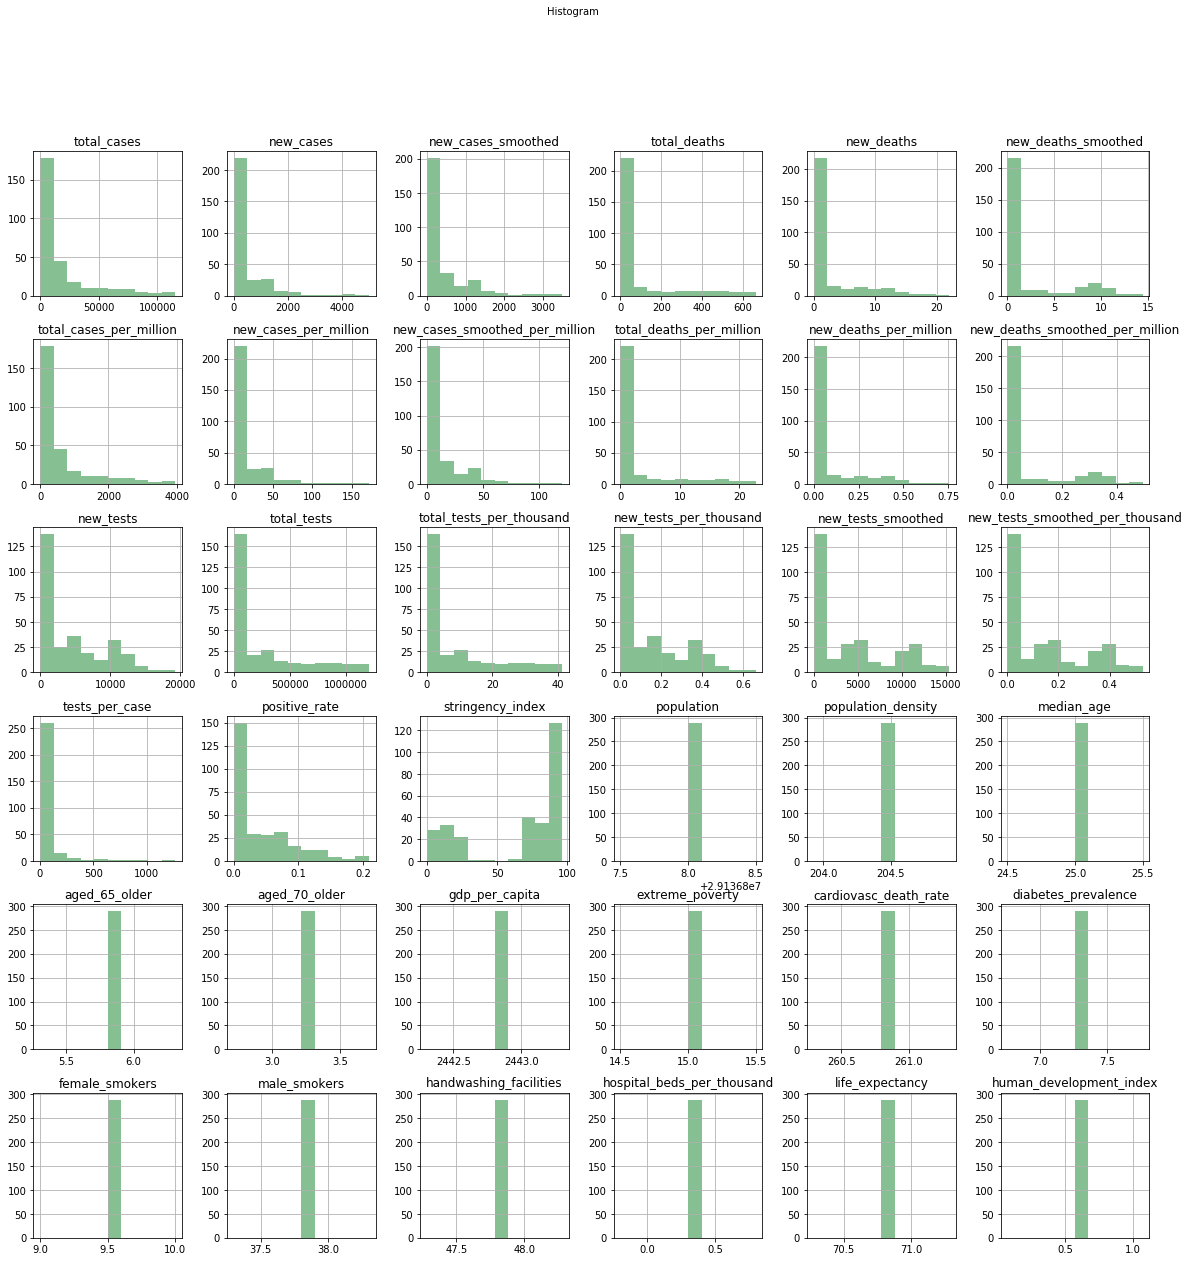

In [31]:
nep_df.hist(figsize=(20,20), color='#86bf91') # plot histogram
plt.suptitle("Histogram", fontsize=10) # use suptitle to add title to all
plt.show()

#### HeatMap

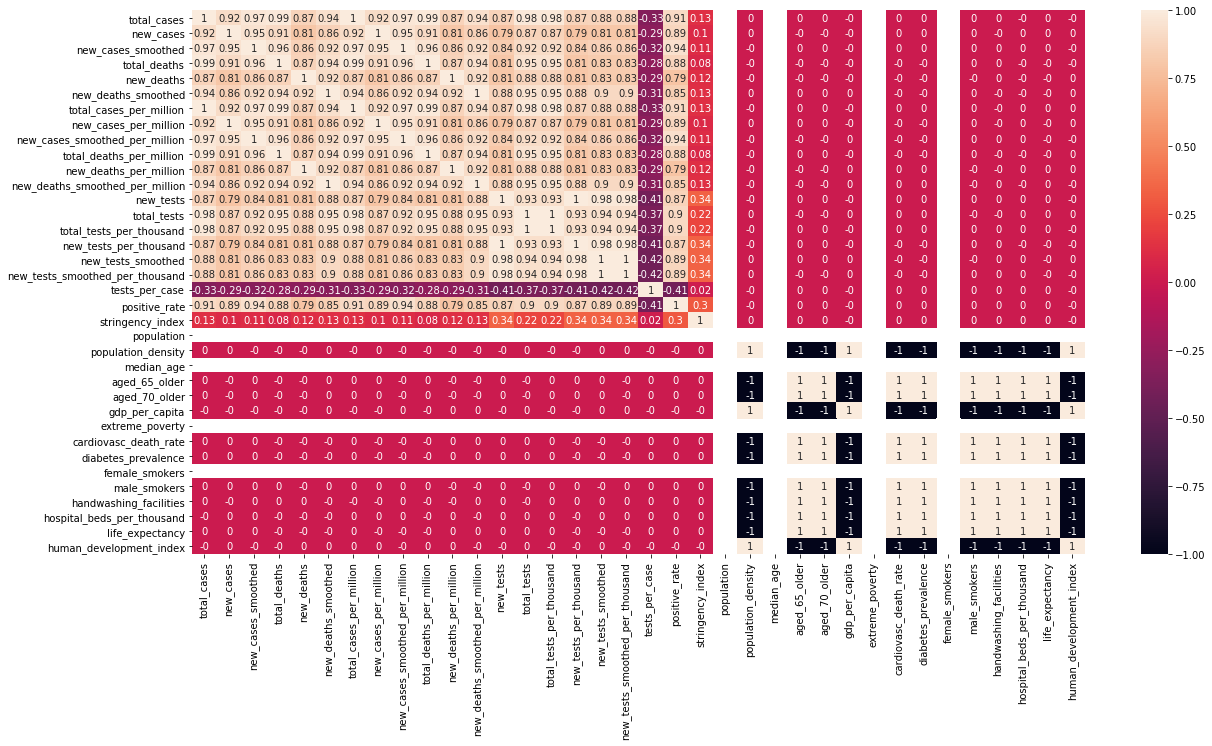

In [32]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

from sklearn import datasets,linear_model
correlation_matrix=nep_df.corr().round(2)

sns.heatmap(data=correlation_matrix,annot=True,annot_kws={'size': 10})

##### Lets see the distribution in data using scatterplot

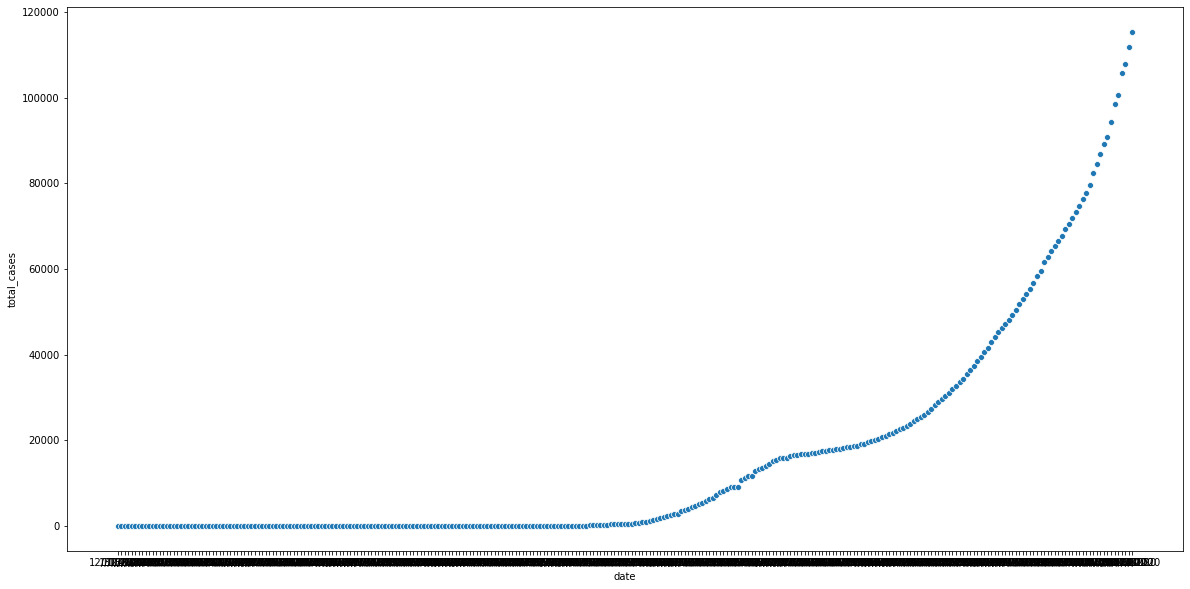

In [33]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

sns.scatterplot(x=nep_df['date'], y=nep_df['total_cases'])

In [35]:
!pip install fbprophet

  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [36]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.6


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



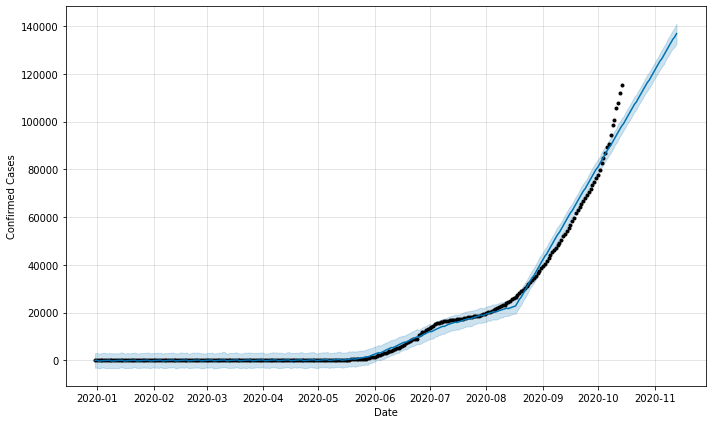

In [38]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = nep_df.date
data['y'] = nep_df.total_cases

prop=Prophet()
prop.fit(data)
future=prop.make_future_dataframe(periods=30)
prop_forecast=prop.predict(future)
forecast = prop_forecast[['ds','yhat']].tail(30)

fig = plot_plotly(prop, prop_forecast)
fig = prop.plot(prop_forecast,xlabel='Date',ylabel='Confirmed Cases')